# Ford GoBike Data Exploration

- [Preliminary Wrangling](#wrangle)
- [Univariate Explorations](#univariate)
- [Bivariate Explorations](#bivariate)
- [Multivariate Explorations](#multivariate)
- [Conclusion](#conclusion)
- [References](#references)

<a id='wrangle'></a>
## Preliminary Wrangling

This document explores a dataset containing trips of 2506983 customer/subscriber from Ford GoBike 2017 dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Gather Data**  
Gather the data from the Ford GoBike website. The dataset we will be using is of year 2017. I chose this dataset because it constains the data for entire year. Other sets were having month wise dataset.  

You can download the dataset form this [LINK](https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip)

In [2]:
df = pd.read_csv('./2017-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


**Assess**
Perform visual and programmatic assesment for quality and tidiness issues

Issues : 

- start_time, end_time, are strings instead of datetime
- Calculate displacement from start and end latitude, longitudes
- drop start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude
- Extract month, day information form start_time
- Extract time information into a new column
- drop start_time and end_time
- Convert month and day to categorical datatype

In [4]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.start_station_name.unique()

array(['Laguna St at Hayes St',
       'Yerba Buena Center for the Arts (Howard St at 3rd St)',
       'Downtown Berkeley BART', '8th St at Ringold St',
       'Bancroft Way at Telegraph Ave',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Addison St at Fourth St',
       'Mechanics Monument Plaza (Market St at Bush St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       '3rd St at Townsend St', 'Clay St at Battery St',
       'Folsom St at 9th St', 'Cyril Magnin St at Ellis St',
       'San Salvador St at 9th St',
       'Garfield Square (25th St at Harrison St)',
       'The Embarcadero at Sansome St', 'Broadway at Kearny',
       'S Park St at 3rd St', 'California St at University Ave',
       'Frank H Ogawa Plaza', 'Dolores St at 15th St',
       'The Alameda at Bush St', '19th Street BART Station',
       'Valencia St at 16th St', 'Post St at Kearny St',
       'San Francisco City Hall (Polk St at Grove St)',
       'Church St at Duboce A

### Clean

- Define
    - Change the start_time, end_time to datetime
- Code

In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

- Test

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 51.5+ MB


- Define
    - Calculate Distance from latitude and longitude data and make a new column 'distance'
    - source : https://www.movable-type.co.uk/scripts/latlong.html
- Code

In [11]:
dLat = np.deg2rad(df['end_station_latitude'] - df['start_station_latitude'])
dLon = np.deg2rad(df['end_station_longitude'] - df['start_station_longitude'])

lat2 = np.deg2rad(df['end_station_latitude'])
lat1 = np.deg2rad(df['start_station_latitude'])

a = np.square(np.sin(dLat/2)) + np.cos(lat1)*np.cos(lat2)*np.square(np.sin(dLon/2))

df['displacement'] = 6371e3*2*np.arctan2(np.sqrt(a), np.sqrt(1-a))

- Test

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,displacement
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,942.931152
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,3069.727103
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1046.622098
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,636.339384


- Define
    - drop start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude
- Code

In [13]:
df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

- Test

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 10 columns):
duration_sec          519700 non-null int64
start_time            519700 non-null datetime64[ns]
end_time              519700 non-null datetime64[ns]
start_station_id      519700 non-null int64
start_station_name    519700 non-null object
end_station_id        519700 non-null int64
end_station_name      519700 non-null object
bike_id               519700 non-null int64
user_type             519700 non-null object
displacement          519700 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 39.7+ MB


- Define
    - extract day and month information form start_time into new columns day and month
- Code

In [15]:
df['month'] = df.start_time.dt.month_name()
df['day'] = df.start_time.dt.weekday_name

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 12 columns):
duration_sec          519700 non-null int64
start_time            519700 non-null datetime64[ns]
end_time              519700 non-null datetime64[ns]
start_station_id      519700 non-null int64
start_station_name    519700 non-null object
end_station_id        519700 non-null int64
end_station_name      519700 non-null object
bike_id               519700 non-null int64
user_type             519700 non-null object
displacement          519700 non-null float64
month                 519700 non-null object
day                   519700 non-null object
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 47.6+ MB


- Define
    - Extract hour info into a new column
- Code

In [17]:
df['hour'] = df.start_time.dt.hour

- Test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec          519700 non-null int64
start_time            519700 non-null datetime64[ns]
end_time              519700 non-null datetime64[ns]
start_station_id      519700 non-null int64
start_station_name    519700 non-null object
end_station_id        519700 non-null int64
end_station_name      519700 non-null object
bike_id               519700 non-null int64
user_type             519700 non-null object
displacement          519700 non-null float64
month                 519700 non-null object
day                   519700 non-null object
hour                  519700 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 51.5+ MB


- Define
    - Drop start_time and end_time columns
- Code

In [19]:
df.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [20]:
df.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,displacement,month,day,hour
0,80110,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,942.931152,December,Sunday,16
1,78800,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,3069.727103,December,Sunday,15
2,45768,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,0.000000,December,Sunday,22
3,62172,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,1046.622098,December,Sunday,17
4,43603,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,636.339384,December,Sunday,14


- Define
    - Change month, hour and day type to categorical
- Code

In [21]:
ordered_month = pd.api.types.CategoricalDtype(ordered=True, categories=['June', 'July', 'August', 'September', 'October', 'November', 'December'])
df.month = df.month.astype(ordered_month)

In [22]:
ordered_day = pd.api.types.CategoricalDtype(ordered=True, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df.day = df.day.astype(ordered_day)

In [23]:
ordered_hour = pd.api.types.CategoricalDtype(ordered=True, categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df.hour = df.hour.astype(ordered_hour)

- Test

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 11 columns):
duration_sec          519700 non-null int64
start_station_id      519700 non-null int64
start_station_name    519700 non-null object
end_station_id        519700 non-null int64
end_station_name      519700 non-null object
bike_id               519700 non-null int64
user_type             519700 non-null object
displacement          519700 non-null float64
month                 519700 non-null category
day                   519700 non-null category
hour                  519700 non-null category
dtypes: category(3), float64(1), int64(4), object(3)
memory usage: 33.2+ MB


In [25]:
# save the cleaned dataset
df.to_csv('master_cleaned.csv', index=False)

### Structure of Dataset

There are 519700 rides in the dataset with 10 features viz, duration_sec, start_time, end_time, start_station_id, end_station_id, start_station_name, end_station_name, bike_id, user_type. Most variables are numeric in nature, but the variables user type and start_station_name, and end_station_name are categorical variables


|Feature   	|Data Type   	|
|---	|---	|
|duration_sec   	|int64   	|
|month   	|category   	|
|day   	|category   	|
|hour   	|category   	|
|start_station_id   	|int64   	|
|start_station_name   	|object   	|
|end_station_id   	|int64   	|
|end_station_name   	|object   	|
|bike_id   	|int64   	|
|user_type   	|object   	|
|displacement   	|float64   	|

### Main feature(s) of interest in Dataset

I'm most interested in figuring user behaviour and which stations had more traffic, relation between duration and user type and displacement, and also the monthly and hourly trend of the users

###  Features in the dataset do I think will help support my investigation into your feature(s) of interest

I expect that the subscriber user_type will have more duration and more displacement. I also think that users use the service more on the morning hour because they need to get to work and in the evening when they return back to work 


<a id='univariate'></a>
## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest duration

**Ride Duration Distribution**

In [26]:
df.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

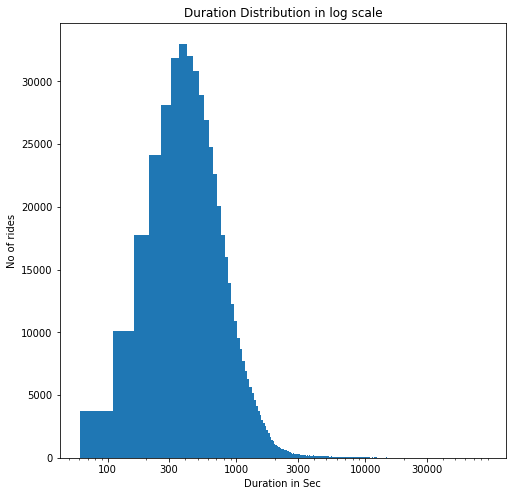

In [27]:
plt.figure(figsize=(8,8))
bins = np.arange(df.duration_sec.min(), df.duration_sec.max()+50, 50)
plt.hist(data=df, x='duration_sec', bins=bins);
plt.title('Duration Distribution in log scale')
plt.xlabel('Duration in Sec')
plt.ylabel('No of rides')
plt.xscale('log');
ticks = [100, 300, 1000, 3000,10000, 30000]
plt.xticks(ticks, ticks);

Let us observe it on a violin plot after removing some outliers. Here I am considering duration above 10000 as outliers.

Text(0, 0.5, 'Ride Spread')

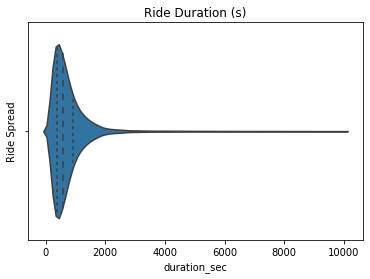

In [28]:
temp = df[df.duration_sec < 10000]
sns.violinplot(data=temp, x='duration_sec', inner='quartile')
plt.title('Ride Duration (s)')
plt.ylabel('Ride Spread')

**User type distribution**

It is important to know how many subscribes are there and how many customers

In [29]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

Text(0, 0.5, 'No. of Rides')

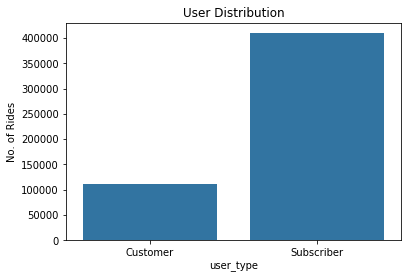

In [30]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='user_type', color=base_color);
plt.title('User Distribution');
plt.ylabel('No. of Rides')

Interestingly, most of the users are subscribers means that they use the service on a regular basis. And only a few are the customers.

**Displacement Distribution**  
Note: Here the displacement doesn't mean the distance travelled. What it really means that how far the user has deposited the bike from the starting station. It is useful information as it can help position the stations effectively.

In [31]:
df['displacement'].describe()

count    519700.000000
mean       1587.076787
std        1010.391336
min           0.000000
25%         899.642404
50%        1400.244014
75%        2072.493832
max       68186.786944
Name: displacement, dtype: float64

**On an average** a user will deposite the bike within 1.4 km radius from the starting station.

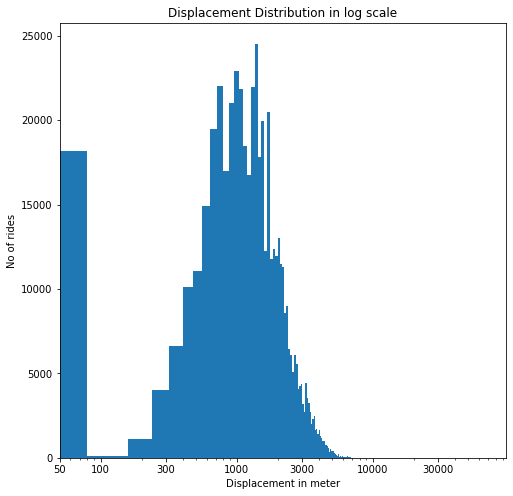

In [32]:
plt.figure(figsize=(8,8))
bins = np.arange(0, df.displacement.max()+80, 80)
plt.hist(data=df, x='displacement', bins=bins);
plt.title('Displacement Distribution in log scale')
plt.xlabel('Displacement in meter')
plt.ylabel('No of rides')
plt.xscale('log');
ticks = [50, 100, 300, 1000, 3000, 10000, 30000]
plt.xticks(ticks, ticks);

Here, we can observe that many people are taking and depositing the bike at the same station thats why we have two peaks. let us now remove the zero displacement.  

**Month wise ride distribution**  
Now we will see the distribution of rides on monthly bases. We will come to know in which month we have more users and which month has less users.

In [33]:
df.month.unique()

[December, November, October, September, August, July, June]
Categories (7, object): [June < July < August < September < October < November < December]

[News](https://i.imgur.com/61s6tZE.jpg "News")
From this news article I came to know that the service started in only June 28. So, the distribution is reasonable.  
https://techcrunch.com/2017/06/01/fords-gobike-bike-sharing-service-to-launch-across-the-bay-area-on-june-28/

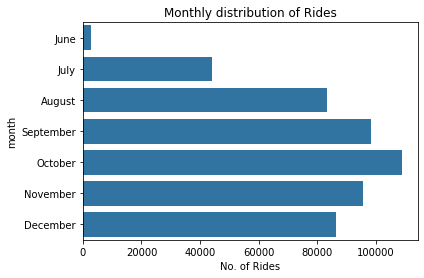

In [36]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='month', color=base_color);
plt.title('Monthly distribution of Rides');
plt.xlabel('No. of Rides');

Given that the services started in June we can see that the rides are increasing each month with a slight decrease in the month of December because of Festivals. This suggests that most of the users are daily commuters as the rides always decrease on the holidays>

**Day Wise Distribution of Rides**

Here we will see the day wise distribution of rides

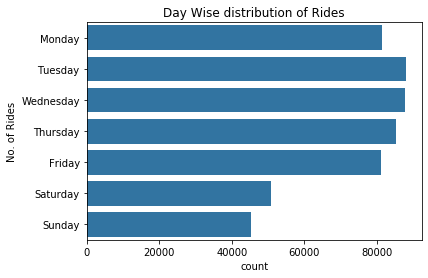

In [37]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='day', color=base_color);
plt.title('Day Wise distribution of Rides');
plt.ylabel('No. of Rides');

It is clearly visible that on weekends the users are less which the weekdays have almost equal user on each day. This could be because most of the users are subscribers and they use the service to commute between their office and home.  We will see more about this in multivariate plots

**Hourly Distribution of Rides**

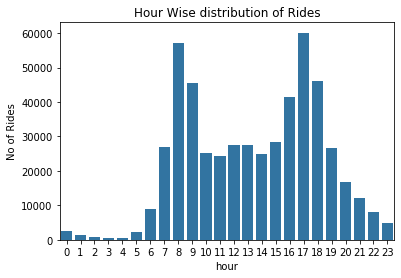

In [38]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='hour', color=base_color);
plt.title('Hour Wise distribution of Rides');
plt.ylabel('No of Rides');

It is a bi-modal distribution.  
We can observe that there are two peaks in our rides one at 8 in the morning and other peak at the 17 in the evening. 

**Station**  
Now we will see which station has most no. of users we'll see the starting station as well as ending station

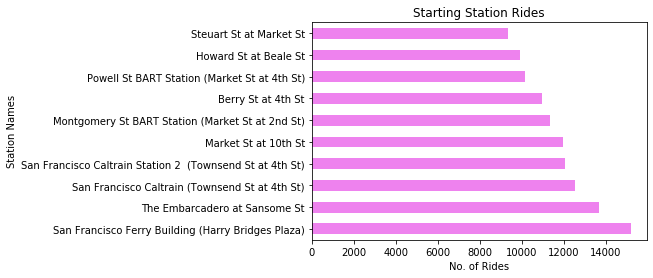

In [40]:
df.start_station_name.value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='violet');
plt.title('Starting Station Rides')
plt.xlabel('No. of Rides');
plt.ylabel('Station Names');

We can see that the San Francisco Ferry Building (Harry Bridges Plaza) has most no. of starting rides. We will later see that wether the deposite is also the same or not

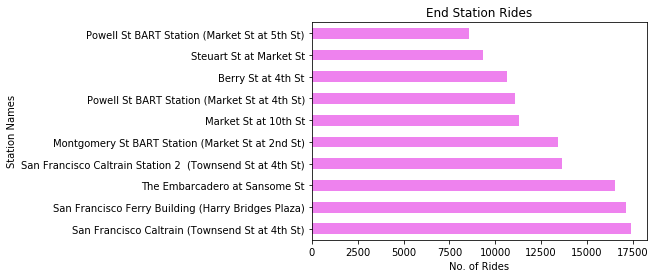

In [41]:
df.end_station_name.value_counts().sort_values(ascending=False)[:10].plot(kind='barh', color='violet');
plt.title('End Station Rides')
plt.xlabel('No. of Rides');
plt.ylabel('Station Names');

Here, we can see that the starting and end station distributions are different we will investigate it a litte more to see whether a station has positive starting ride or negative starting rides. Ideally, they should be equal but here San Francisco Caltrain (Townsend St at 4th St) is having  17978 end rides while its end ride in only 12546

**Differenc between start and end rides**

In [42]:
(df.start_station_name.value_counts() - df.end_station_name.value_counts()).sum()

0

Sum Must be zero of all the starting station rides - end station rides

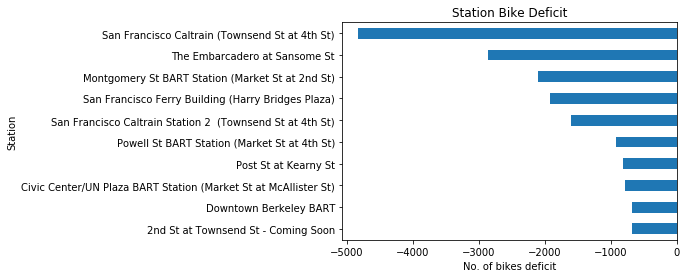

In [43]:
(df.start_station_name.value_counts() - df.end_station_name.value_counts()).sort_values(ascending=False)[-10:].plot(kind='barh')
plt.title('Station Bike Deficit');
plt.xlabel('No. of bikes deficit');
plt.ylabel('Station');

In [44]:
(df.start_station_name.value_counts() - df.end_station_name.value_counts()).sort_values(ascending=False)[-10:]

2nd St at Townsend St - Coming Soon                                -672
Downtown Berkeley BART                                             -675
Civic Center/UN Plaza BART Station (Market St at McAllister St)    -778
Post St at Kearny St                                               -809
Powell St BART Station (Market St at 4th St)                       -922
San Francisco Caltrain Station 2  (Townsend St at 4th St)         -1603
San Francisco Ferry Building (Harry Bridges Plaza)                -1922
Montgomery St BART Station (Market St at 2nd St)                  -2109
The Embarcadero at Sansome St                                     -2867
San Francisco Caltrain (Townsend St at 4th St)                    -4832
dtype: int64

We can see that the San Francisco Caltrain (Townsend St at 4th St) Station has 4832 bike deposites at the end. Which means that it offered more as end station point and less as starting station point.

Here it is shown how much extra rides or end rides a station is doing. The Service workers have to make sure that each station has sufficient no of bike so using this data they can find which station need how much of extra bike and from which station it can be taken. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration_sec took on a large range values, so I looked at the data using a log transform, Under the transform the data looked skewed to the left. Most of the gives were of short length and only a few rides were of more duration.  
All the plots strongly suggest that our users are mostly daily commuter to office and they are subscribers also. We will investigate more on this in bivariate Elploration and multivarite exploration
Things observed at this step 
- Most of the users are subscribers
- Ridership is increases form June to October and then decreases
- Ridership is almost constant on weekdays (Mon-Fri) then decreses
- Highest ridership on 8:00 and 17:00, suggests that users are office commuters
- San Francisco Caltrain (Townsend St at 4th St) is station with highest deficit of no of bikes. That is more no. of bikes given then no. of bikes deposited.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Changed the type of start_time, end_time to datetime
- Calculate displacement from start and end latitude, longitudes values and put the values on a new column named displacement
- Dropped the start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude
- Extracted month, day information form start_time
- Extracted time information into a new column
- Dropped start_time and end_time
- Convert month and day to categorical datatype


<a id='bivariate'></a>
## Bivariate Exploration

To start off with, I want to look at the pairwise correlations between the columns

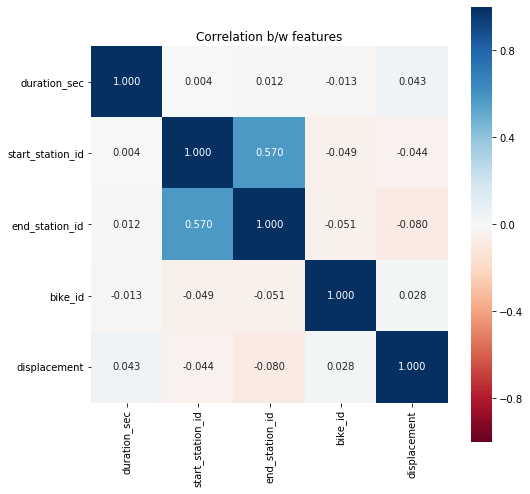

In [45]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), cmap = 'RdBu',  square=True, vmin=-1, vmax=1, annot=True, fmt = '.3f');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation b/w features');

One important observation we can make here it is the **starting_station and ending_station are highly related**. This means that the users are chosing same set of starting and ending stations.

**User Type vs Duration**

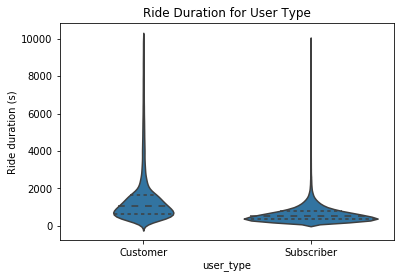

In [46]:
temp = df[df.duration_sec < 10000]
base_color = sns.color_palette()[0]
sns.violinplot(data=temp, y='duration_sec', x='user_type', inner='quartile', color=base_color)
plt.title('Ride Duration for User Type');
plt.ylabel('Ride duration (s)');

Form this plot we can see that the customer spend more time using the service than customer. This was not expected as subscriber should use the service more duration.  
We will also plot the mean duration for each user type.

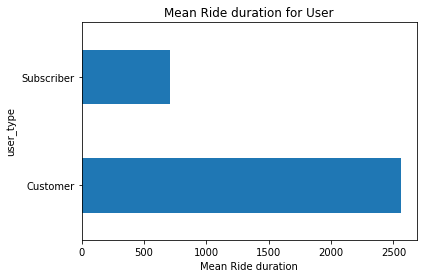

In [64]:
df.groupby('user_type').duration_sec.mean().plot(kind='barh');
plt.title('Mean Ride duration for User');
plt.xlabel('Mean Ride duration');

Two things to note:  
- Customers use the service for more duration on a single ride
- Subscribers use the service for short rides

**Relation between user_type and displacement** 

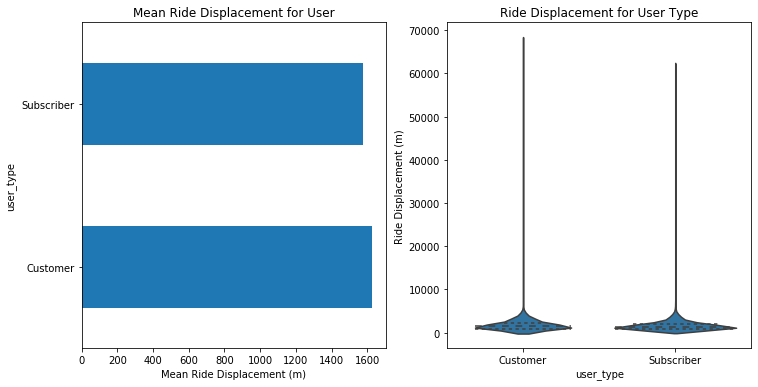

In [121]:
plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
df.groupby('user_type').displacement.mean().plot(kind='barh');
plt.title('Mean Ride Displacement for User');
plt.xlabel('Mean Ride Displacement (m)');

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data=df, y='displacement', x='user_type', inner='quartile', color=base_color)
plt.title('Ride Displacement for User Type');
plt.ylabel('Ride Displacement (m)');

There is not much difference in displace for subscribers and customers. However, I expected the subscribers to have more displacement. 

**Week wise, user distribution of rides**

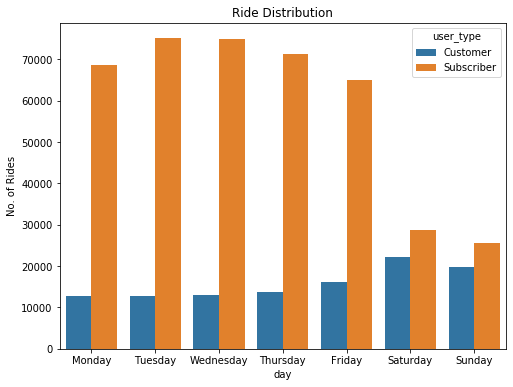

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'day', hue='user_type');
plt.ylabel('No. of Rides');
plt.title('Ride Distribution');

One thing to note here is that while the no. of rides by subscribers decreases of weekends the no. of rides by customer increases.

**Hour wise, user distribution of rides**

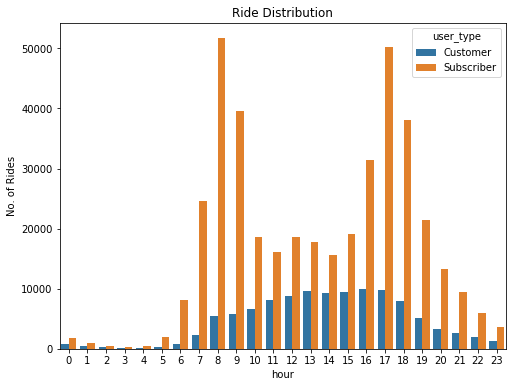

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'hour', hue='user_type');
plt.ylabel('No. of Rides');
plt.title('Ride Distribution');

The results are also the same here the no. of rides by customer increases as the no. of rides by subscribers decreases. It is consistent with the above Week wise plot. We can see that at 14:00 the subscribers ridership is min (local) while the customer ridership is at max

**Ride Duration vs Displacement**  
Let's see if we can find anything unusual about the ride duration vs displacement.

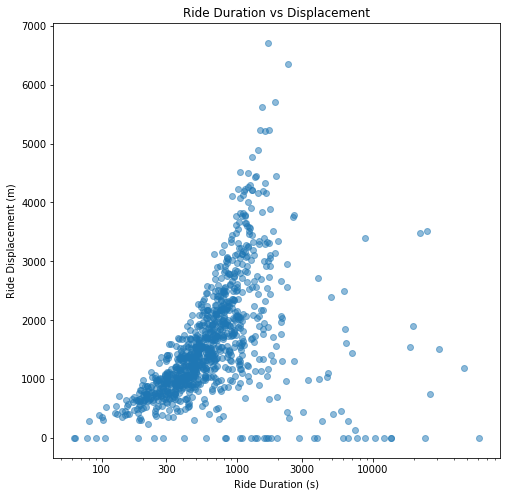

In [71]:
# let us sample it first because our dataset is huge
sample = df.sample(1000)
plt.figure(figsize=(8,8))
plt.scatter(data=sample, x='duration_sec', y='displacement', alpha=0.5);
plt.title('Ride Duration vs Displacement');
plt.xlabel('Ride Duration (s)');
plt.ylabel('Ride Displacement (m)')
plt.xscale('log')
ticks = [100, 300, 1000, 3000, 10000]
plt.xticks(ticks, ticks);

 As expected the displacement increases as the ride duration increases.

**Relation between hours and weeks rides**

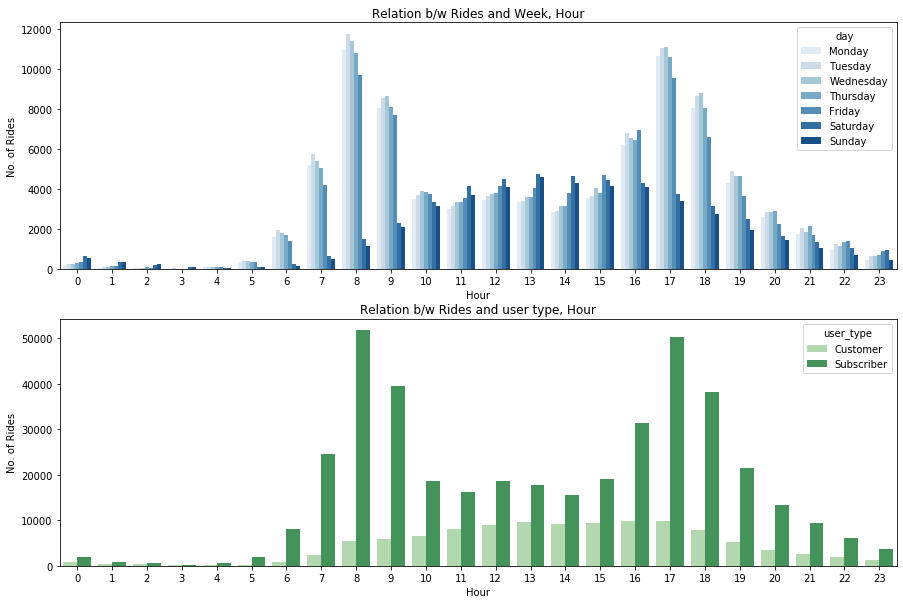

In [142]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='hour', hue='day', palette = 'Blues');
plt.title('Relation b/w Rides and Week, Hour');
plt.xlabel('Hour');
plt.ylabel('No. of Rides');

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='hour', hue='user_type', palette = 'Greens');
plt.title('Relation b/w Rides and user type, Hour');
plt.xlabel('Hour');
plt.ylabel('No. of Rides');

Things to note:
- On weekdays ridership increased at 8:00, and 17:00 while on weekends the ridership increases between 11:00 to 15:00
- Weekends have more ridership at night. See 0:00 and from II plot we can see that they are the subcribers mostly

Now lets plot the categorical datas against our numerical data such as duration_sec, displacement, start_station_id, end_station_id 

In [148]:
categorical_vars = ['month', 'day', 'hour']

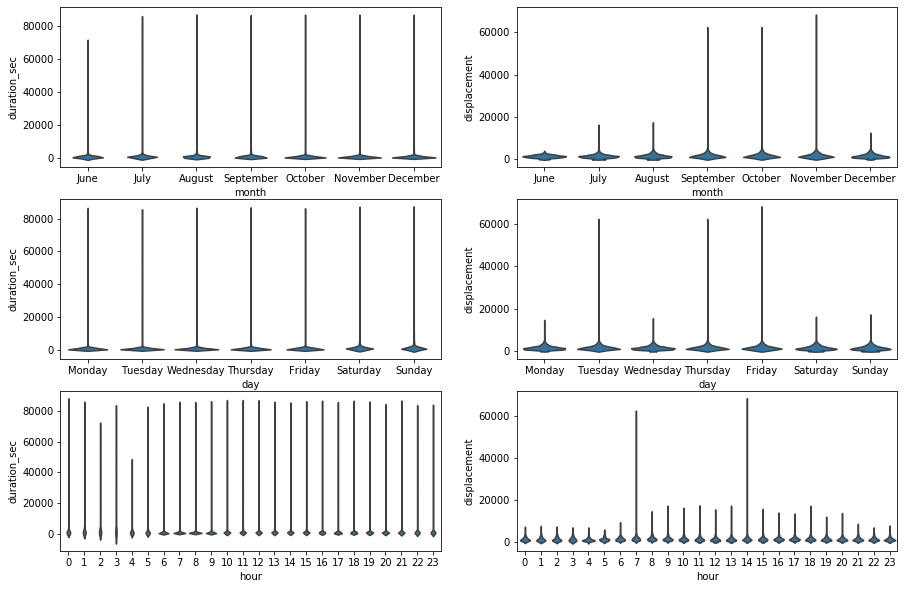

In [160]:
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [15,10])

default_color = sns.color_palette()[0]
for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    sns.violinplot(data = df, x = var, y = 'duration_sec', ax = ax[i,0], color = default_color, inner=None)
    sns.violinplot(data = df, x = var, y = 'displacement', ax = ax[i,1], color = default_color, inner=None)

plt.show()

We can make the following observations from the violenplots above:  
- The duration has no effect on the hour at which the bike is picked up and the day of the week or month 
- The displacement increases on 7:00 and 14:00 this is mostly beacause the office commuters using the service
- On tuesday, thursday and friday we can see there is an increase in displacement. We need to investigate more on this thing

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Surprisingly, the subscribers have rides with less duration than the customers. And the customers then to use the service on the weekends and mostly on the afternoon whereas the subscribers use in on weekdays and between working hours.

There was a relation between starting station ID and ending station ID. Seems, people mostly use to commute between two set of stations and not randomly go here and there.

Following observations were made in this part:  
- starting_station and ending_station are highly related**. This means that the users are chosing same set of starting and ending stations.
- Customer uses the bike for more duration on average than Subscribers
- The no. of rides by customer increases as the no. of rides by subscribers decreases. It is consistent with the above Week wise plot. We can see that at 14:00 the subscribers ridership is min (local) while the customer ridership is at maximum.
- On weekdays ridership increased at 8:00, and 17:00 while on weekends the ridership increases between 11:00 to 15:00
- Weekends have more ridership at night. See 0:00 and from II plot we can see that they are the subcribers mostly

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The observations made on this stage is insteresting, starting_station and ending_station are highly related**. This means that the users are chosing same set of starting and ending stations. Customer uses the bike for more duration on average than Subscribers. The no. of rides by customer increases as the no. of rides by subscribers decreases. It is consistent with the above Week wise plot. We can see that at 14:00 the subscribers ridership is min (local) while the customer ridership is at maximum. On weekdays ridership increased at 8:00, and 17:00 while on weekends the ridership increases between 11:00 to 15:00. Weekends have more ridership at night. See 0:00 and from II plot we can see that they are the subcribers mostly.



<a id='multivariate'></a>
## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [2]:
df = pd.read_csv('./master_cleaned.csv')

**Relation between duration vs displacement, day wise and hour wise**

In [82]:
def scatterPlot(x, y, **kwargs):
    alpha_ = kwargs.pop('alpha')
    plt.scatter(x, y, alpha=alpha_)
    plt.xscale('log')
    ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
    plt.ylim(0, 10000)
    plt.xticks(ticks, ticks)

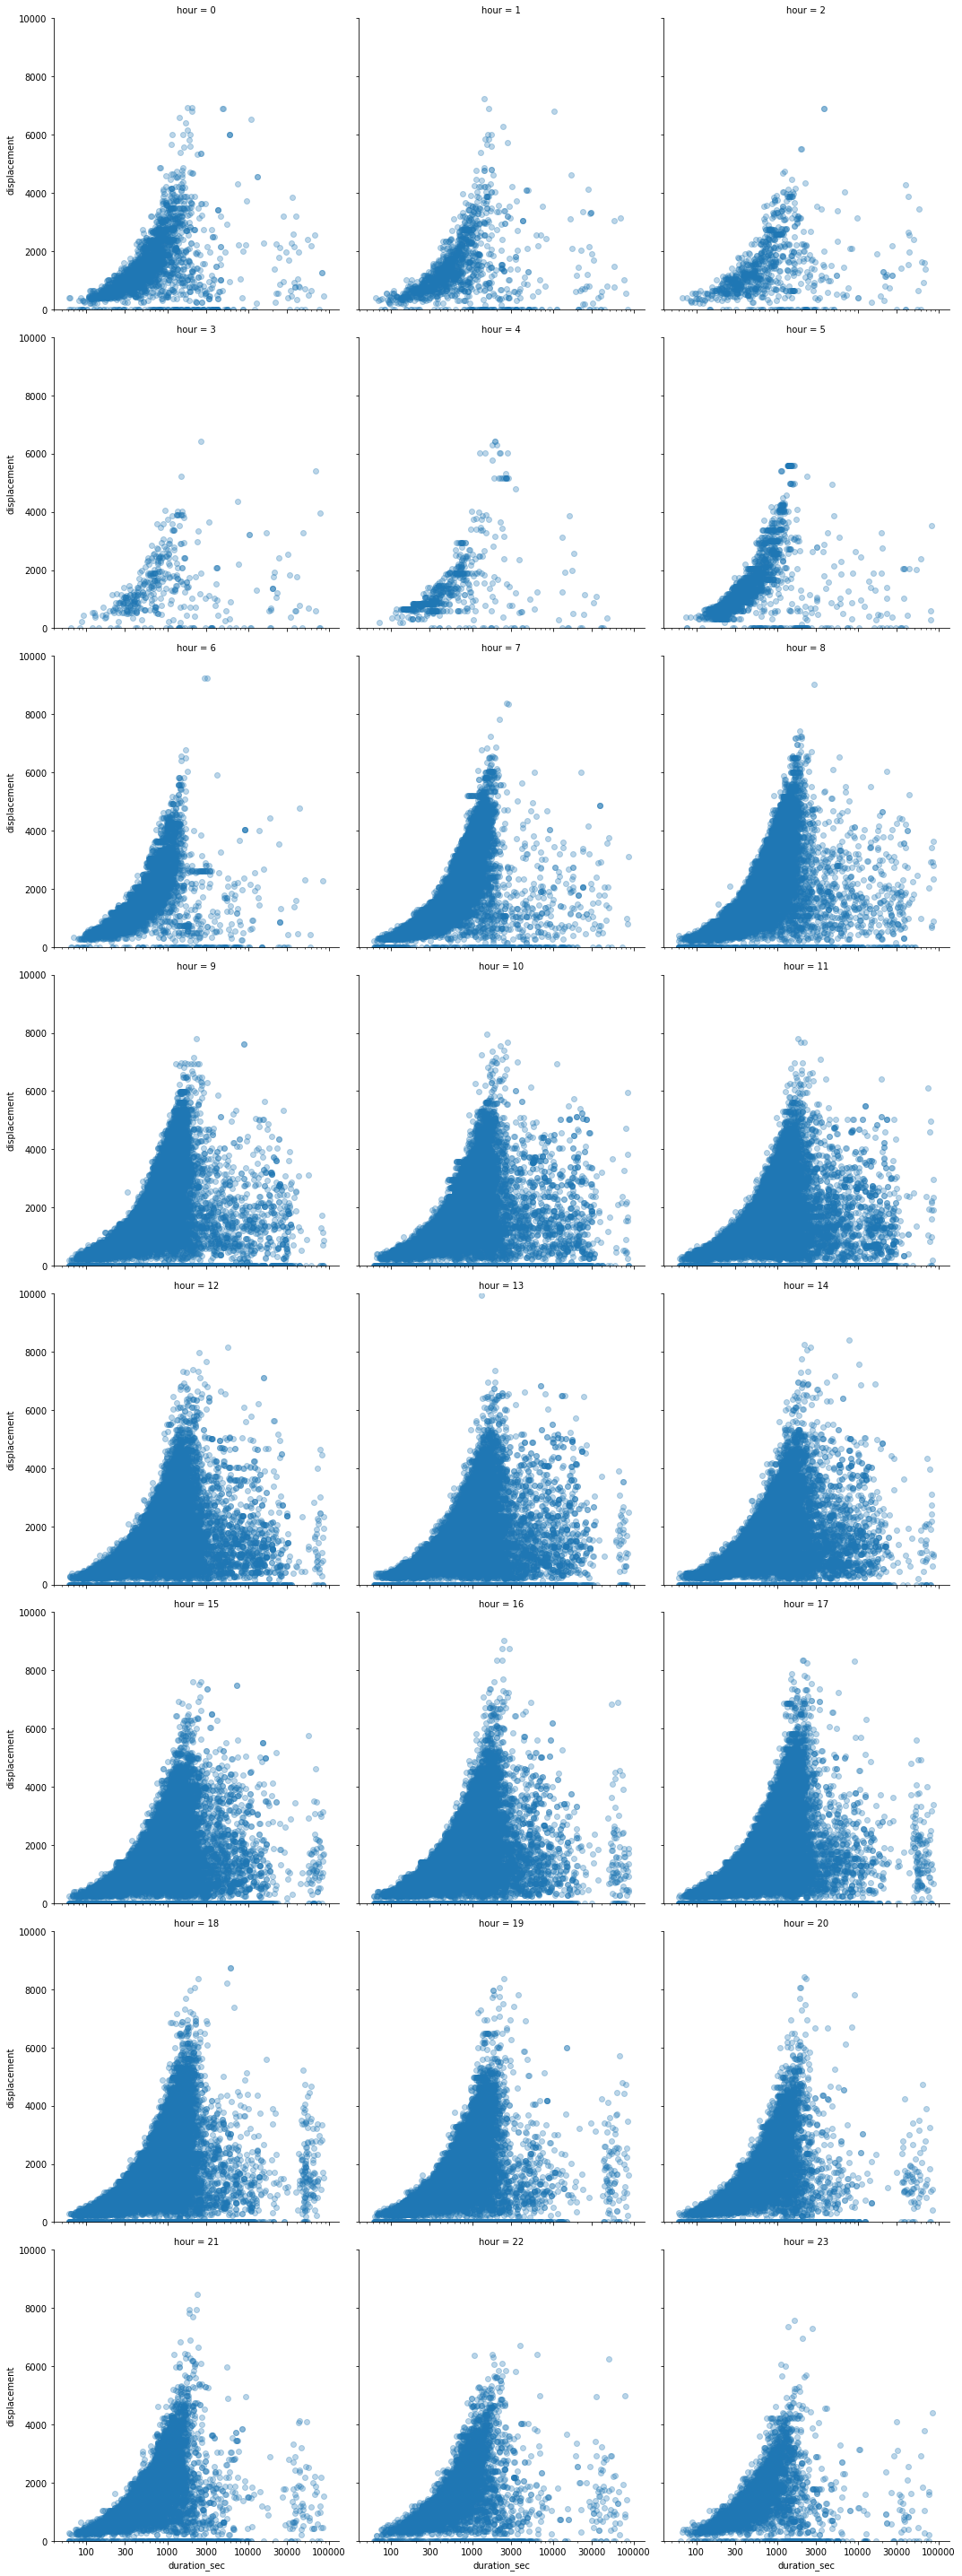

In [83]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(data = df, col = 'hour', col_wrap = 3, height=5)
g.map(scatterPlot, 'duration_sec', 'displacement', alpha=0.3);

Not much information we can infer from these plots as all the plots are same except for no. of points which will obviously differ because no. of users at different time.

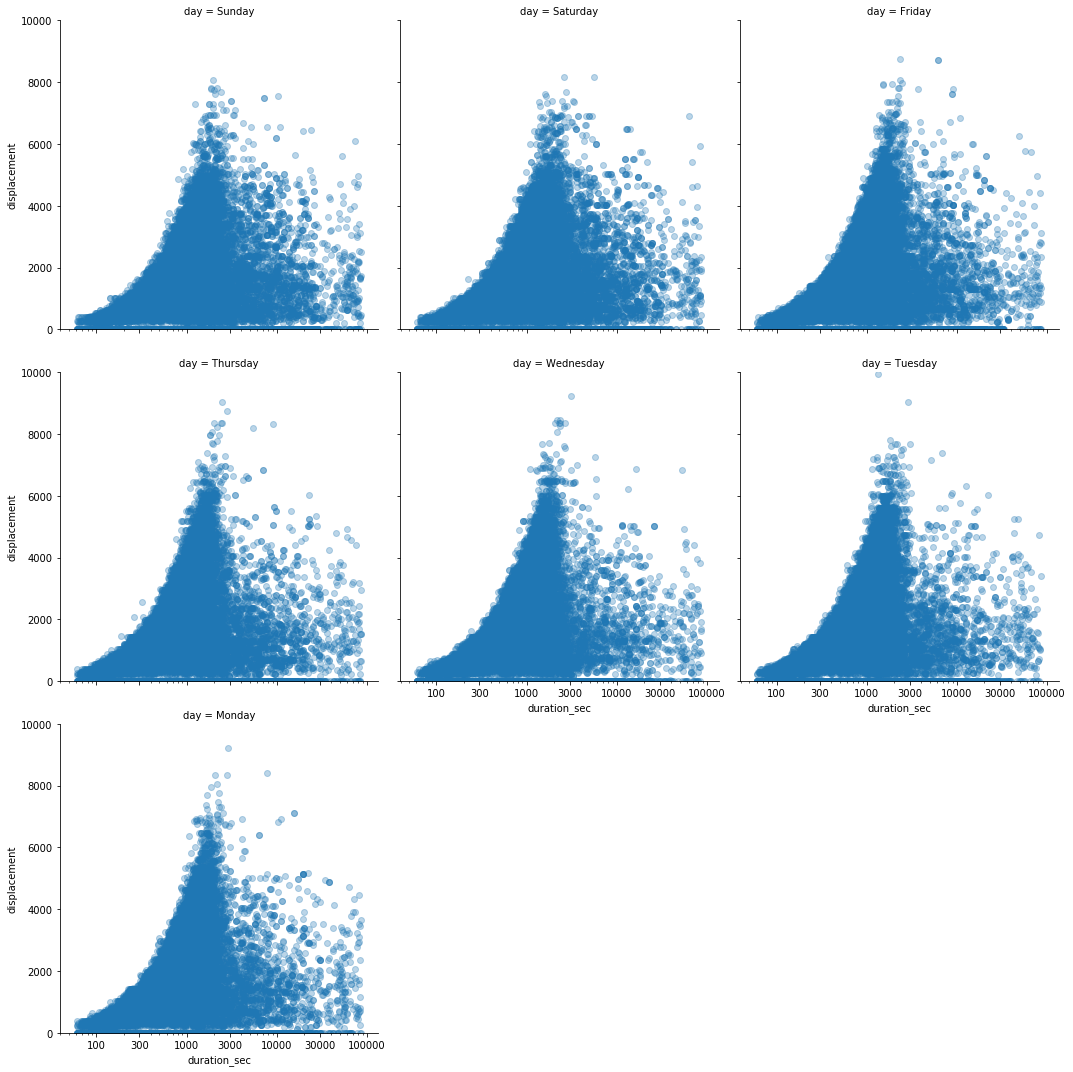

In [84]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(data = df, col = 'day', col_wrap = 3, height=5)
g.map(scatterPlot, 'duration_sec', 'displacement', alpha=0.3);

Here also we can not infer much information. All the plots look identical here.

df.info()

**Relation between No. of rides vs hour of day, day wise**

In [86]:
def plot(x, **kwargs):
    hue_ = kwargs.pop('hue')
    color = kwargs.pop('color')
    sns.countplot(x, color=color)

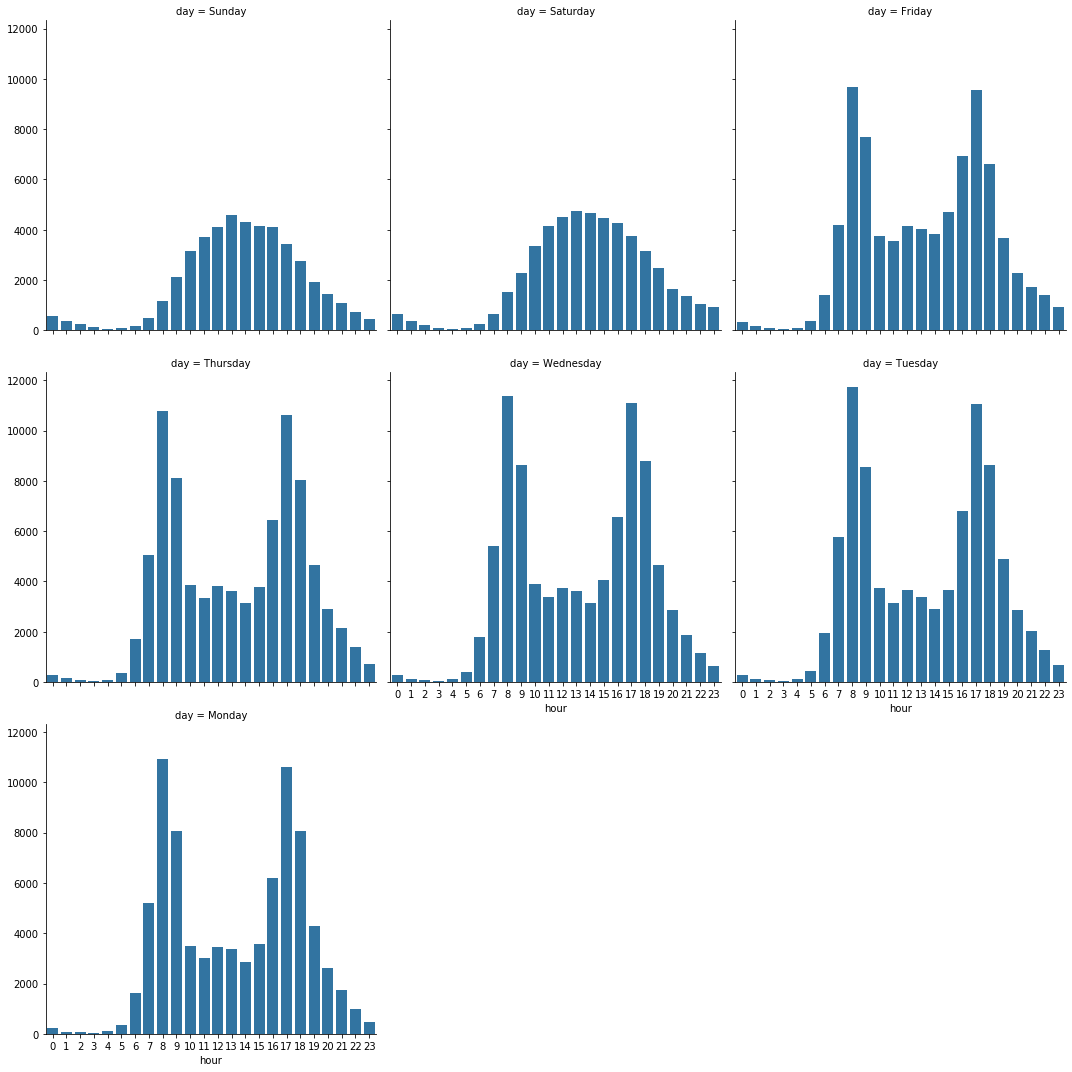

In [60]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(data = df, col = 'day', col_wrap = 3, height=5)
g.map(plot, 'hour', hue='user_type', color=base_color);

This plots further validates our findings. The weekdays have bimodal distribution with two peaks one ar 8:00 and another at 17:00. Also, the distribution on weekends are normal.

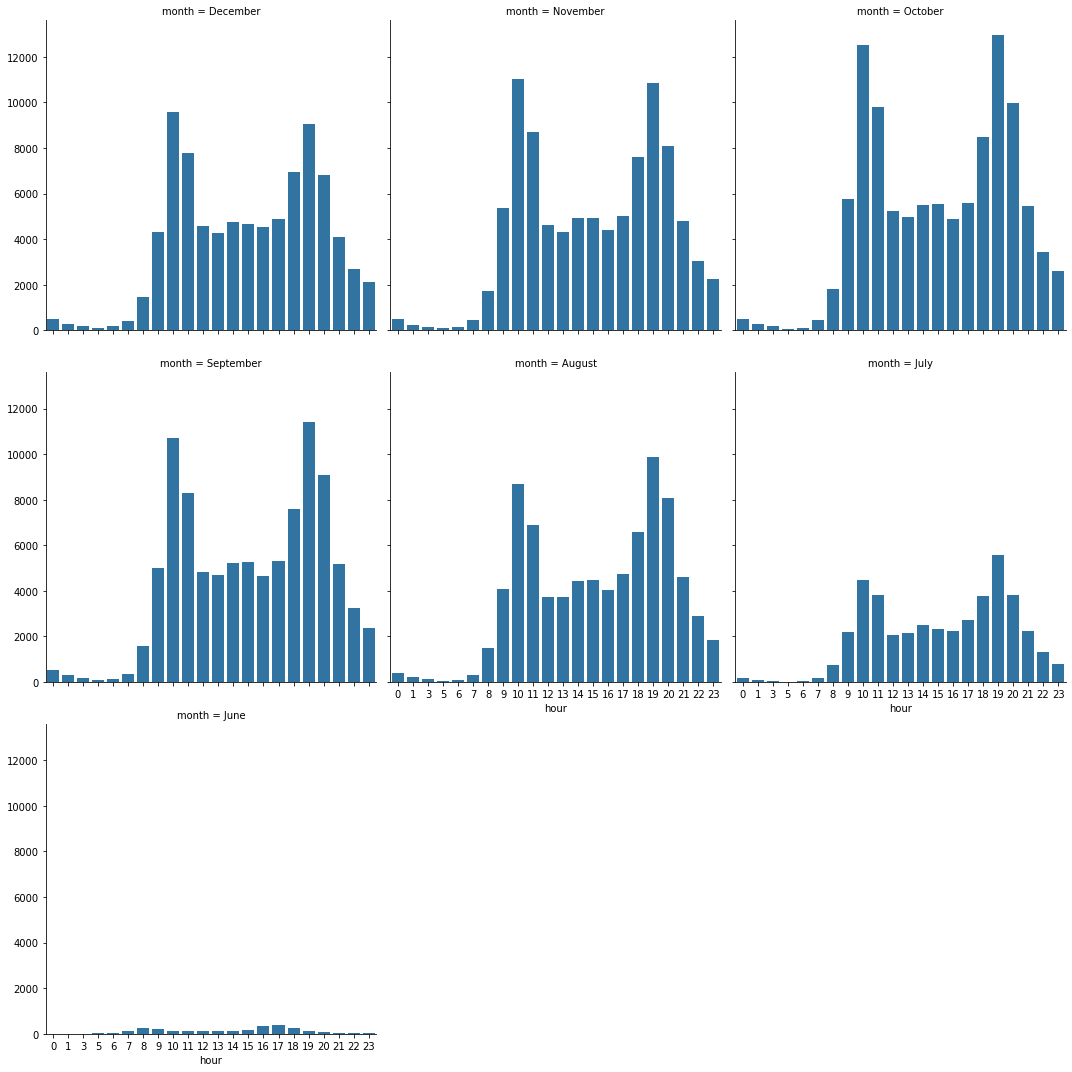

In [89]:
base_color = sns.color_palette()[0]
g = sns.FacetGrid(data = df, col = 'month', col_wrap = 3, height=5)
g.map(plot, 'hour', hue='user_type', color=base_color);

We can observe from the above plot that no. of office commuters increased form July, to August drastically. As the two plots started having bi-modal distribution.  

Now lets extract top 10 stations with most of the starting station of commuter

Now lets make a line plot of No of rides for Hour vs Day vs User_type

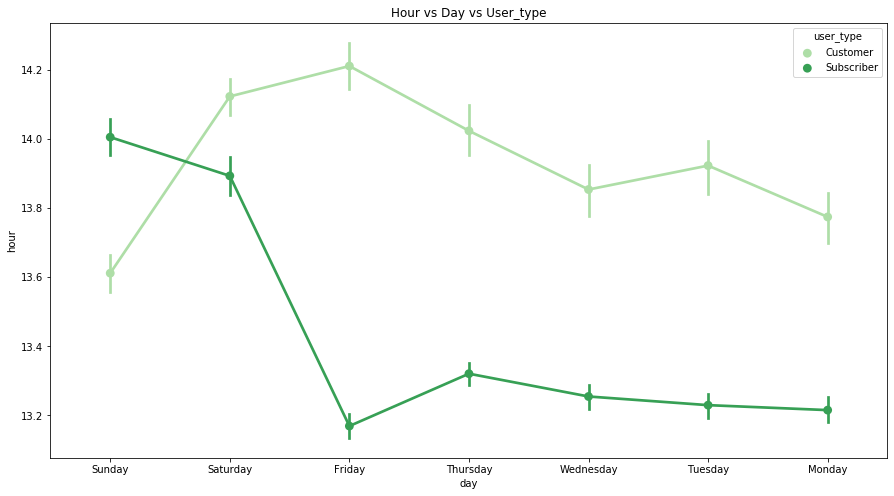

In [108]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x='day', y='hour', hue='user_type', palette = 'Greens')
plt.title('Hour vs Day vs User_type');

We can see that the customers uses the bike service at the afternoon between 13:00 to 14:00 on average. Whereas the subscribers use it mostly form Monday to Friday at 13:00 but we know that it is because subscribers use it mostly on 8:00 and 17:00 so the graph is showing us the averat at 13:00.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part of the analysis we observed the following observations
- We can observe from the above plot that no. of office commuters increased form July, to August drastically. As the two plots started having bi-modal distribution.  
- The weekdays have bimodal distribution with two peaks one ar 8:00 and another at 17:00. Also, the distribution on weekends are normal.

### Were there any interesting or surprising interactions between features?

June has almost no ride data as the services started form July only. One interesting observation I made that the subscriber count increased drastically from July to August as the services became famous.

<a id='conclusion'></a>
## Conclusion
After the analysis we can make following observations:  
- Most of the users are subscribers.
- Ridership is increases form June to October and then decreases on November, December.
- Ridership is almost constant on weekdays (Mon-Fri) then decreses on weekends.
- Highest ridership on 8:00 and 17:00, suggests that users are office commuters.
- San Francisco Caltrain (Townsend St at 4th St) is station with highest deficit on no. of bikes. That is more no. of bikes given then no. of bikes deposited.
- starting_station and ending_station are highly related. This means that the users are chosing same set of starting and ending stations.
- Customer uses the bike for more duration on average than Subscribers.
- The no. of rides by customer increases as the no. of rides by subscribers decreases. At 14:00 the subscribers ridership is min (local) while the customer ridership is at maximum.
- On weekdays ridership increased at 8:00, and 17:00 while on weekends the ridership increases between 11:00 to 15:00
- Weekends have more ridership at night.
- The no. of office commuters increased form July, to August drastically.


<a id='references'></a>
## References
- https://s3.amazonaws.com/baywheels-data/index.html
- https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
- https://stackoverflow.com/questions/12850345/how-do-i-combine-two-data-frames/46661368#46661368
- https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot